<a href="https://colab.research.google.com/github/Dulavinya/EN3160-ImageProcessing/blob/main/A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving a1images.zip to a1images.zip


In [5]:
import zipfile
import os

# Replace 'images.zip' with your actual zip file name
zip_file = "a1images.zip"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("images")  # Extract to folder named "images"

# Optional: list files extracted
print("Files extracted to 'images/':", os.listdir("images"))


Files extracted to 'images/': ['a1images']


In [6]:
import os

# List the files to confirm
print(os.listdir("images/a1images"))



['a1q5images', 'brain_proton_density_slice.png', 'shells.tif', 'jeniffer.jpg', 'daisy.jpg', 'einstein.png', 'emma.jpg', 'highlights_and_shadows.jpg', 'spider.png']


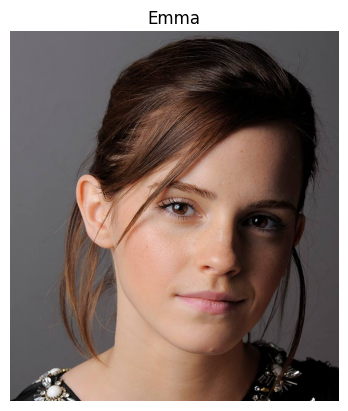

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Now load the image from the extracted folder
img = cv.imread("images/a1images/emma.jpg", cv.IMREAD_UNCHANGED)


if img is None:
    raise FileNotFoundError("Image not found. Check path and filename.")

# Display the image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Emma")
plt.show()


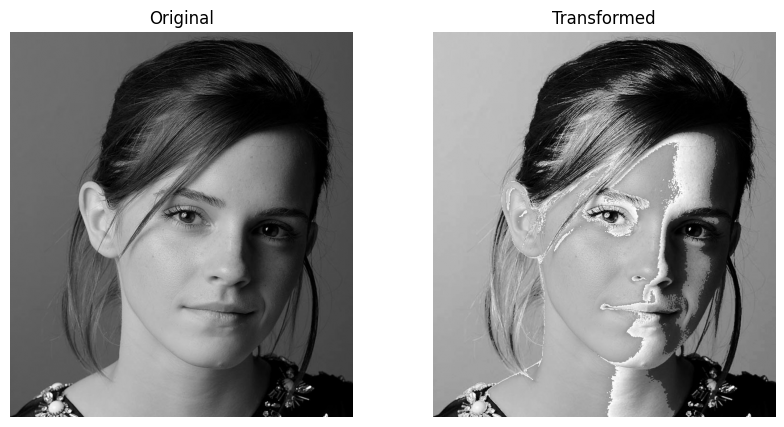

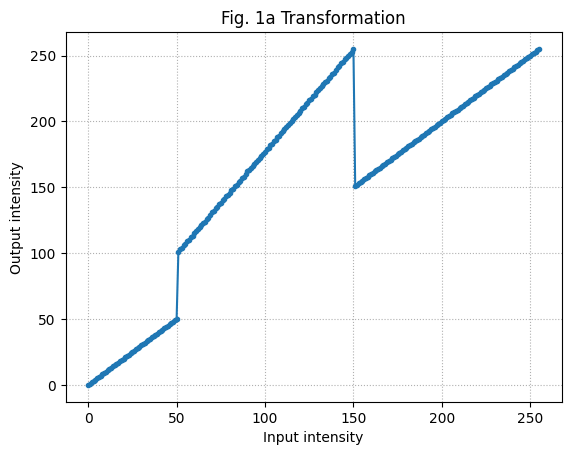

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read grayscale image
f = cv.imread('images/a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

t1 = np.arange(0, 51)
t2 = np.linspace(100, 255, 101)
t3 = np.arange(150, 256)

# Concatenate into one mapping table and Remove duplicate points at the joins (50 and 150)
T = np.concatenate((t1, t2[1:], t3[1:])).astype(np.uint8)


# Apply transformation

g = T[f]


plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(f, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(g, cmap='gray'); plt.title('Transformed'); plt.axis('off')
plt.show()

# Plot transformation function
plt.plot(np.arange(256), T, '-o', markersize=3)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.title("Fig. 1a Transformation")
plt.grid(True, ls=":")
plt.show()

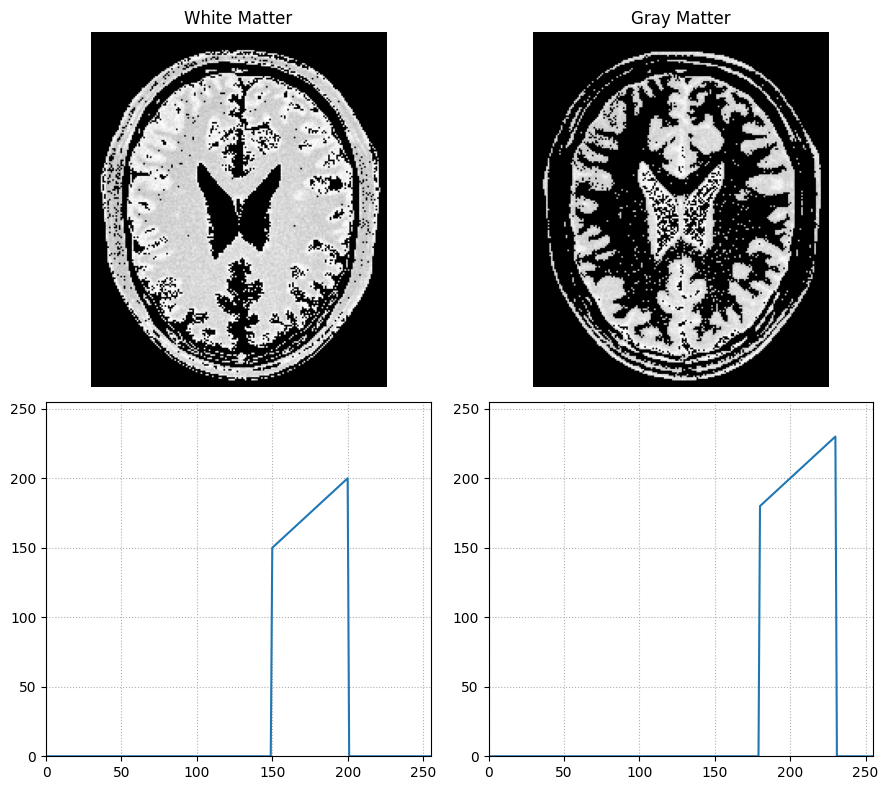

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- load grayscale MRI ---
img = cv2.imread("images/a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)
assert img is not None

x = np.arange(256)  # for plotting / reference

def bandpass_identity_lut(lo, hi):
    """
    Strictly linear, zero outside:
        y = 0, x < lo
        y = x, lo <= x <= hi   (built via linspace)
        y = 0, x > hi
    """
    lo = int(np.clip(lo, 0, 255))
    hi = int(np.clip(hi, 0, 255))
    if hi < lo: lo, hi = hi, lo

    pre  = np.zeros(lo, dtype=np.uint8)
    mid  = np.linspace(lo, hi, num=hi-lo+1).astype(np.uint8)  # linear y=x segment
    post = np.zeros(255 - hi, dtype=np.uint8)

    lut = np.concatenate([pre, mid, post])  # length = 256
    return lut

# choose bands (edit if you like)
wm_lo, wm_hi = 150, 200
gm_lo, gm_hi = 180, 230

lut_wm = bandpass_identity_lut(wm_lo, wm_hi)
lut_gm = bandpass_identity_lut(gm_lo, gm_hi)

wm = cv2.LUT(img, lut_wm)
gm = cv2.LUT(img, lut_gm)

# --- show like your example ---
plt.figure(figsize=(9,8))
plt.subplot(2,2,1); plt.imshow(wm, cmap='gray'); plt.title("White Matter"); plt.axis('off')
plt.subplot(2,2,2); plt.imshow(gm, cmap='gray'); plt.title("Gray Matter");  plt.axis('off')
plt.subplot(2,2,3); plt.plot(x, lut_wm); plt.xlim(0,255); plt.ylim(0,255); plt.grid(True, ls=":")
plt.subplot(2,2,4); plt.plot(x, lut_gm); plt.xlim(0,255); plt.ylim(0,255); plt.grid(True, ls=":")
plt.tight_layout(); plt.show()


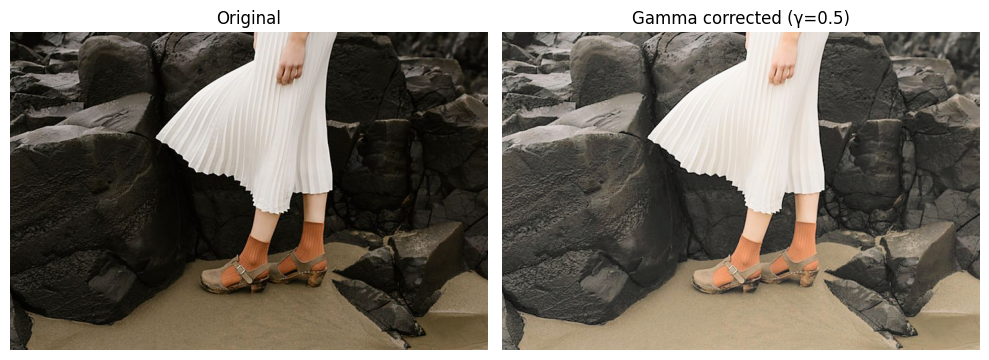

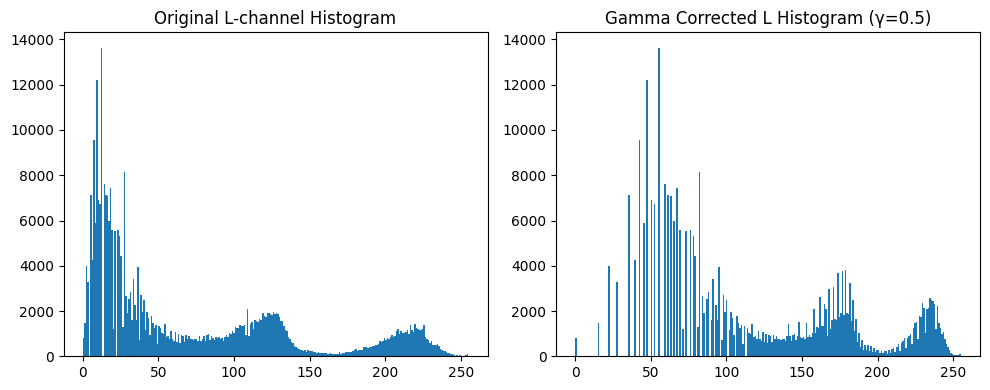

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("images/a1images/highlights_and_shadows.jpg")
if img is None:
    raise FileNotFoundError("Check the file path")

# Convert to Lab
lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
L, a, b = cv2.split(lab)

# Gamma value (<1 brightens, >1 darkens)
gamma = 0.5

# Build gamma LUT (0–255 input → gamma corrected output)
t = np.array([(i / 255.0) ** gamma * 255 for i in np.arange(256)], dtype=np.uint8)

# Apply to L channel
L_gamma = cv2.LUT(L, t)

# Merge back and convert to BGR
lab_gamma = cv2.merge((L_gamma, a, b))
img_gamma = cv2.cvtColor(lab_gamma, cv2.COLOR_Lab2BGR)

# Show original and corrected
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB))
plt.title(f"Gamma corrected (γ={gamma})")
plt.axis("off")
plt.tight_layout()
plt.show()

# Show histograms separately
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(L.ravel(), bins=256, range=(0,255))
plt.title("Original L-channel Histogram")
plt.subplot(1,2,2)
plt.hist(L_gamma.ravel(), bins=256, range=(0,255))
plt.title(f"Gamma Corrected L Histogram (γ={gamma})")
plt.tight_layout()
plt.show()


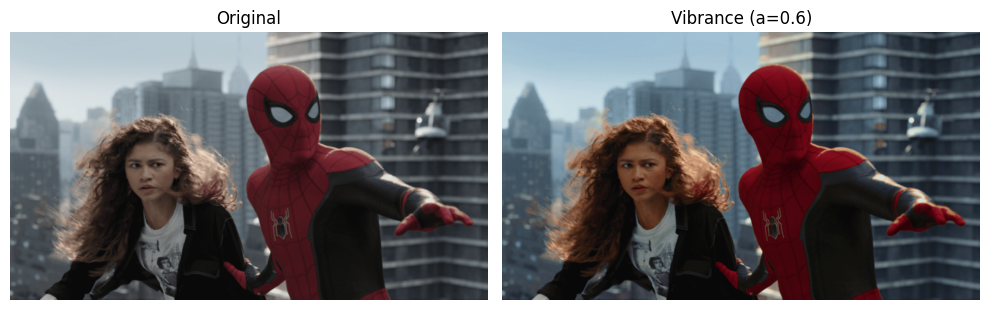

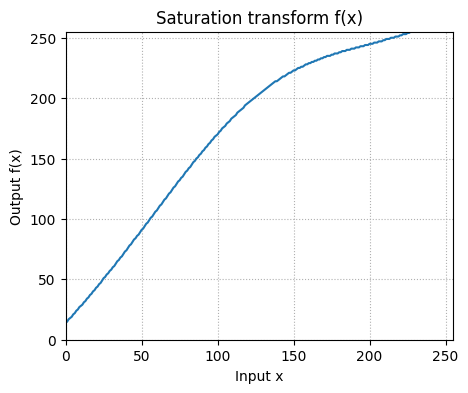

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- load image ---
img = cv2.imread("images/a1images/spider.png")
if img is None:
    raise FileNotFoundError("Check image path")

# --- HSV split ---
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv)              # each is 0..255 (uint8)

# --- vibrance transform on S (given in the question) ---
sigma = 70.0
a = 0.6                                # tweak in [0,1] until it looks nice; report this value

x = np.arange(256, dtype=np.float32)   # input intensities 0..255
f = x + a * 128.0 * np.exp(-((x - 128.0) ** 2) / (2 * sigma ** 2))
lut = np.clip(f, 0, 255).astype(np.uint8)   # min(…, 255)

S_enh = cv2.LUT(S, lut)                # apply to saturation plane

# --- recombine & back to BGR for display ---
hsv_enh = cv2.merge((H, S_enh, V))
img_enh = cv2.cvtColor(hsv_enh, cv2.COLOR_HSV2BGR)

# --- show original vs vibrance-enhanced ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(img_enh, cv2.COLOR_BGR2RGB)); plt.title(f"Vibrance (a={a})"); plt.axis("off")
plt.tight_layout(); plt.show()

# --- show intensity transformation (f(x)) ---
plt.figure(figsize=(5,4))
plt.plot(x, lut)
plt.title("Saturation transform f(x)")
plt.xlabel("Input x"); plt.ylabel("Output f(x)")
plt.xlim(0,255); plt.ylim(0,255); plt.grid(True, ls=":")
plt.show()


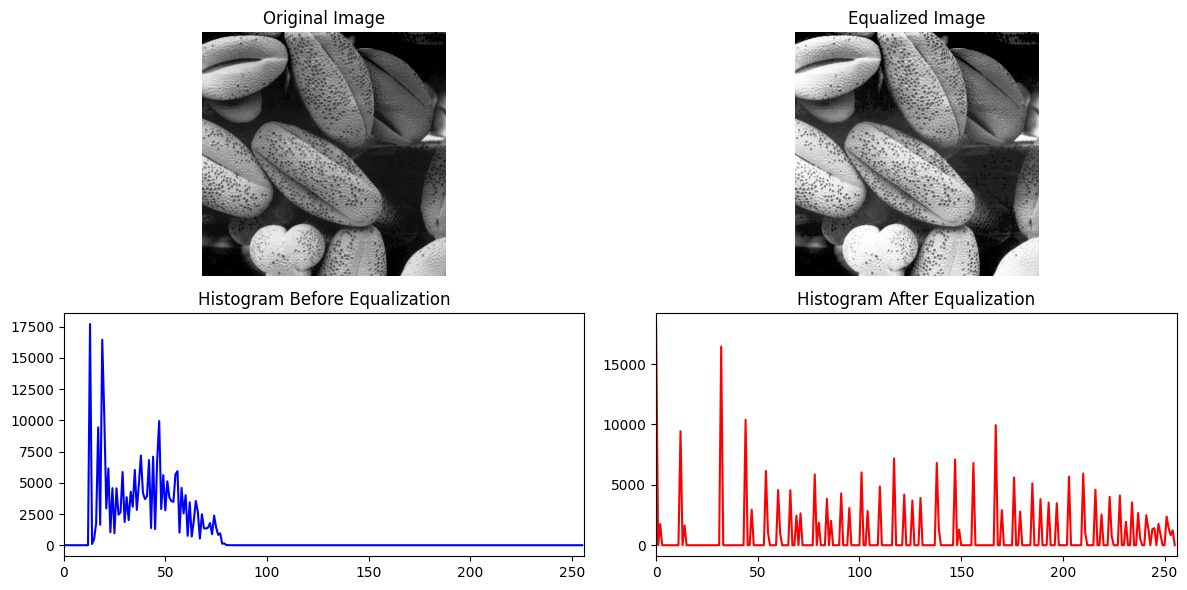

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def my_hist_equalization(img):
    # Flatten image
    hist, bins = np.histogram(img.flatten(), 256, [0,256])

    # Cumulative Distribution Function
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Mask zeros to avoid division errors
    cdf_m = np.ma.masked_equal(cdf, 0)

    # Equalization formula
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Map the original image pixels using cdf
    img_eq = cdf[img]

    return img_eq, hist, np.histogram(img_eq.flatten(), 256, [0,256])[0]

# Load grayscale image
img = cv2.imread("images/a1images/shells.tif", cv2.IMREAD_GRAYSCALE)

# Apply custom histogram equalization
img_eq, hist_before, hist_after = my_hist_equalization(img)

# Display images
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(img_eq, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

plt.subplot(2,2,3)
plt.plot(hist_before, color='blue')
plt.title("Histogram Before Equalization")
plt.xlim([0,256])

plt.subplot(2,2,4)
plt.plot(hist_after, color='red')
plt.title("Histogram After Equalization")
plt.xlim([0,256])

plt.tight_layout()
plt.show()


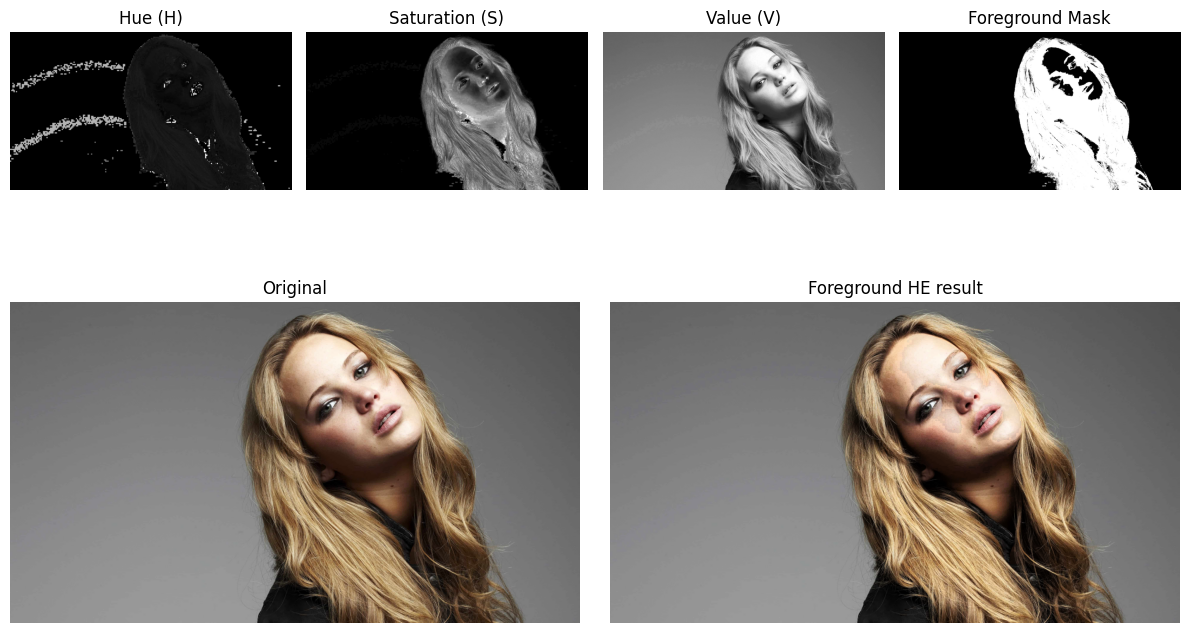

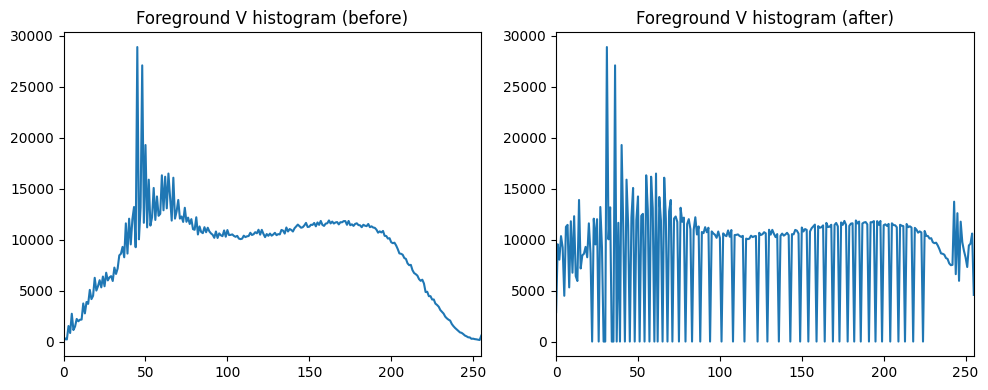

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- (a) open + split to HSV (show planes in grayscale) ----------
img = cv2.imread("images/a1images/jeniffer.jpg")   # <-- update path if needed
if img is None:
    raise FileNotFoundError("Check image path.")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv)     # 0..255 uint8

# ---------- (b) get a foreground mask from the Saturation plane ----------
# Background is gray (low S). Use Otsu on S to separate.
_, mask = cv2.threshold(S, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# If it looks inverted, flip with: mask = 255 - mask

# ---------- (c) foreground only + histogram on V (luminance) ----------
V_fg = V.copy()
V_fg[mask == 0] = 0  # keep only foreground values when plotting hist

# histogram of foreground pixels (0..255)
hist = cv2.calcHist([V], [0], mask, [256], [0,256]).ravel().astype(np.int64)

# ---------- (d) cumulative sum (CDF) ----------
cdf = np.cumsum(hist)
# avoid divide-by-zero: find first nonzero cdf
cdf_min = cdf[np.nonzero(cdf)][0] if np.any(cdf) else 0
N = cdf[-1] if cdf.size else 0

# ---------- (e) build LUT from CDF and equalize only the foreground ----------
# standard HE LUT: round( (cdf[v]-cdf_min)/(N-cdf_min) * 255 )
lut = np.arange(256, dtype=np.uint8)
if N > cdf_min:
    lut = np.round((cdf - cdf_min) / (N - cdf_min) * 255).clip(0,255).astype(np.uint8)

V_eq = V.copy()
fg_idx = (mask == 255)
V_eq[fg_idx] = lut[V[fg_idx]]       # equalize foreground
# (f) background unchanged; recombine
hsv_eq = cv2.merge((H, S, V_eq))
img_eq = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2BGR)

# ---------- display ----------
plt.figure(figsize=(12,8))

plt.subplot(2,4,1); plt.imshow(H, cmap='gray'); plt.title('Hue (H)'); plt.axis('off')
plt.subplot(2,4,2); plt.imshow(S, cmap='gray'); plt.title('Saturation (S)'); plt.axis('off')
plt.subplot(2,4,3); plt.imshow(V, cmap='gray'); plt.title('Value (V)'); plt.axis('off')
plt.subplot(2,4,4); plt.imshow(mask, cmap='gray'); plt.title('Foreground Mask'); plt.axis('off')

plt.subplot(2,2,3); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title('Original'); plt.axis('off')
plt.subplot(2,2,4); plt.imshow(cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB)); plt.title('Foreground HE result'); plt.axis('off')
plt.tight_layout(); plt.show()

# Optional: show histograms (foreground only) before/after
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(hist); plt.title('Foreground V histogram (before)'); plt.xlim(0,255)

hist_after = cv2.calcHist([V_eq],[0],mask,[256],[0,256]).ravel()
plt.subplot(1,2,2)
plt.plot(hist_after); plt.title('Foreground V histogram (after)'); plt.xlim(0,255)
plt.tight_layout(); plt.show()


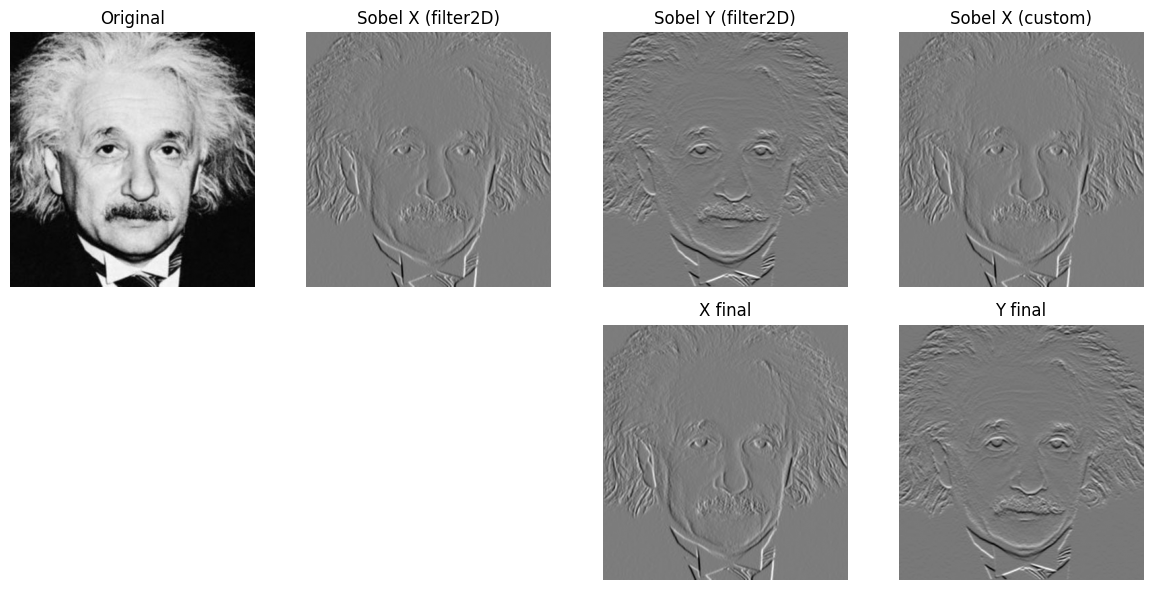

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- load grayscale ---
img = cv2.imread("images/a1images/einstein.png", cv2.IMREAD_GRAYSCALE)
assert img is not None

# Sobel kernels
Kx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], np.float32)
Ky = Kx.T

# Helper: show signed responses with mid-gray = 128
def vis(z):
    z = z.astype(np.float32)
    m = np.max(np.abs(z)) + 1e-8
    return np.clip(z/m*127 + 128, 0, 255).astype(np.uint8)

# (a) filter2D
gx_a = cv2.filter2D(img, cv2.CV_32F, Kx, borderType=cv2.BORDER_REFLECT_101)
gy_a = cv2.filter2D(img, cv2.CV_32F, Ky, borderType=cv2.BORDER_REFLECT_101)

# (b) tiny custom conv (loops, reflect border)
def conv2(im, k):
    kh, kw = k.shape; ph, pw = kh//2, kw//2
    src = cv2.copyMakeBorder(im, ph, ph, pw, pw, cv2.BORDER_REFLECT_101).astype(np.float32)
    out = np.empty_like(im, np.float32)
    for y in range(out.shape[0]):
        for x in range(out.shape[1]):
            out[y,x] = (src[y:y+kh, x:x+kw] * k).sum()
    return out

gx_b = conv2(img, Kx)
gy_b = conv2(img, Ky)

# (c) separable: [1,2,1]^T * [1,0,-1] and its transpose
col_s = np.array([1,2,1], np.float32).reshape(-1,1)
row_d = np.array([1,0,-1], np.float32).reshape(1,-1)
col_d = row_d.T
row_s = col_s.T

x_inter = cv2.filter2D(img, cv2.CV_32F, col_s, borderType=cv2.BORDER_REFLECT_101)
gx_c    = cv2.filter2D(x_inter, cv2.CV_32F, row_d, borderType=cv2.BORDER_REFLECT_101)
y_inter = cv2.filter2D(img, cv2.CV_32F, col_d, borderType=cv2.BORDER_REFLECT_101)
gy_c    = cv2.filter2D(y_inter, cv2.CV_32F, row_s, borderType=cv2.BORDER_REFLECT_101)

# --- show everything in one figure ---
plt.figure(figsize=(12,6))
plt.subplot(2,4,1); plt.imshow(img, cmap='gray');    plt.title('Original'); plt.axis('off')
plt.subplot(2,4,2); plt.imshow(vis(gx_a), cmap='gray'); plt.title('Sobel X (filter2D)'); plt.axis('off')
plt.subplot(2,4,3); plt.imshow(vis(gy_a), cmap='gray'); plt.title('Sobel Y (filter2D)'); plt.axis('off')
plt.subplot(2,4,4); plt.imshow(vis(gx_b), cmap='gray'); plt.title('Sobel X (custom)'); plt.axis('off')

plt.subplot(2,4,7); plt.imshow(vis(gx_c),    cmap='gray'); plt.title('X final');        plt.axis('off')
plt.subplot(2,4,8); plt.imshow(vis(gy_c),    cmap='gray'); plt.title('Y final');        plt.axis('off')
plt.tight_layout(); plt.show()


In [ ]:
import cv2
import numpy as np
from pathlib import Path

# -----------------------------
# Zoom functions (manual)
# -----------------------------
def zoom(img, s: float, method: str):
    if method not in {"nearest", "bilinear"}:
        raise ValueError("method must be 'nearest' or 'bilinear'")
    h, w = img.shape[:2]
    H, W = int(round(h * s)), int(round(w * s))

    if method == "nearest":
        yi = (np.arange(H) / s).round().astype(int)
        xi = (np.arange(W) / s).round().astype(int)
        yi = np.clip(yi, 0, h - 1)
        xi = np.clip(xi, 0, w - 1)
        if img.ndim == 2:
            return img[yi][:, xi]
        return img[yi][:, xi, :]

    # bilinear (center-aligned)
    y = (np.arange(H) + 0.5) / s - 0.5
    x = (np.arange(W) + 0.5) / s - 0.5
    y = np.clip(y, 0, h - 1); x = np.clip(x, 0, w - 1)
    y0 = np.floor(y).astype(int);  x0 = np.floor(x).astype(int)
    y1 = np.clip(y0 + 1, 0, h - 1); x1 = np.clip(x0 + 1, 0, w - 1)
    wy = (y - y0)[:, None];  wx = (x - x0)[None, :]

    if img.ndim == 2:
        Ia = img[y0][:, x0]; Ib = img[y0][:, x1]
        Ic = img[y1][:, x0]; Id = img[y1][:, x1]
        top = (1 - wx) * Ia + wx * Ib
        bot = (1 - wx) * Ic + wx * Id
        out = (1 - wy) * top + wy * bot
        return out.astype(img.dtype)

    Ia = img[y0][:, x0, :]; Ib = img[y0][:, x1, :]
    Ic = img[y1][:, x0, :]; Id = img[y1][:, x1, :]
    top = (1 - wx)[..., None] * Ia + wx[..., None] * Ib
    bot = (1 - wx)[..., None] * Ic + wx[..., None] * Id
    out = (1 - wy)[..., None] * top + wy[..., None] * bot
    return out.astype(img.dtype)

# -----------------------------
# Normalized SSD (0 = perfect)
# -----------------------------
def normalized_ssd(A, B):
    # crop to common size in case of off-by-one rounding
    H = min(A.shape[0], B.shape[0]); W = min(A.shape[1], B.shape[1])
    A = A[:H, :W]; B = B[:H, :W]
    A = A.astype(np.float32); B = B.astype(np.float32)
    mse = np.mean((A - B) ** 2)
    return mse / (255.0 ** 2)

# -----------------------------
# Evaluate your 4 image pairs
# -----------------------------
base = Path("images/a1images/a1q5images")  # change if your folder differs
pairs = [
    ("im01.png",       "im01small.png"),
    ("im02.png",       "im02small.png"),
    ("im03.png",       "im03small.png"),
    ("taylor.jpg",     "taylor_small.jpg"),
]
s = 4.0

print(f"{'Image':12s}  NN-SSD     BL-SSD")
for big_name, small_name in pairs:
    big   = cv2.imread(str(base / big_name), cv2.IMREAD_COLOR)
    small = cv2.imread(str(base / small_name), cv2.IMREAD_COLOR)
    if big is None or small is None:
        print(f"{big_name:12s}  (missing file)")
        continue

    up_nn = zoom(small, s, "nearest")
    up_bl = zoom(small, s, "bilinear")

    # compare to big original
    ssd_nn = normalized_ssd(big, up_nn)
    ssd_bl = normalized_ssd(big, up_bl)
    print(f"{big_name:12s}  {ssd_nn:0.6f}  {ssd_bl:0.6f}")




Image         NN-SSD     BL-SSD
im01.png      0.003926  0.001770
im02.png      0.000994  0.000283
im03.png      0.001995  0.000789
taylor.jpg    0.065734  0.063887


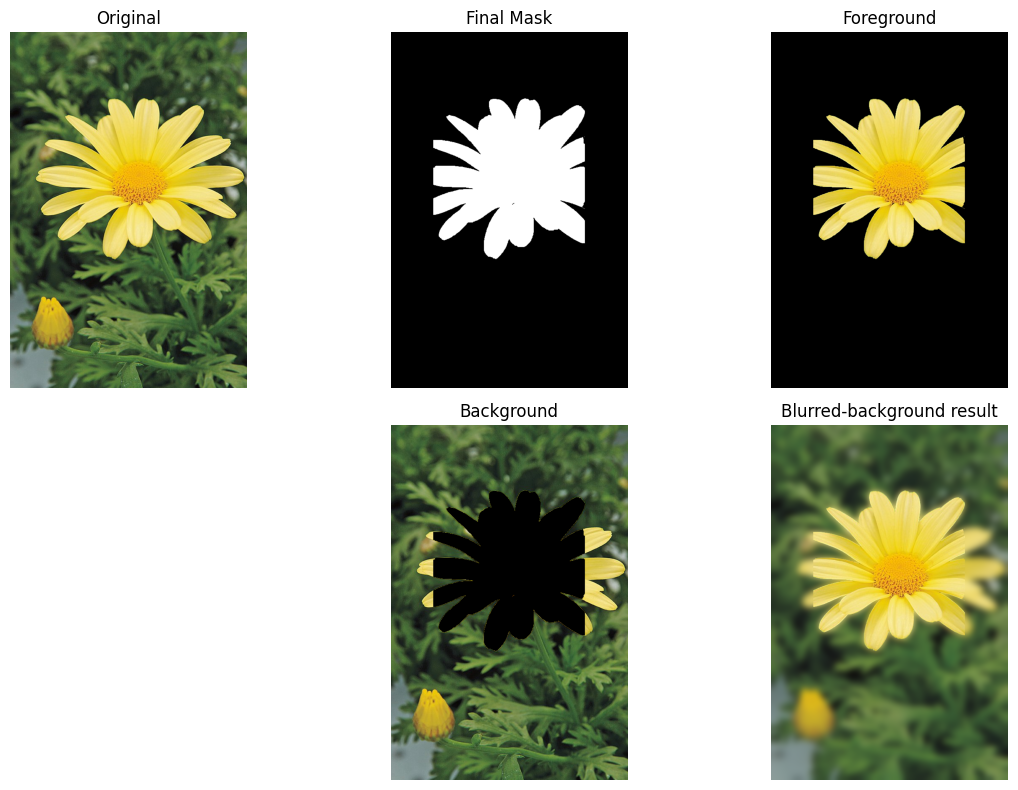

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- load image ---
img = cv2.imread("images/a1images/daisy.jpg")  # <- use your path
if img is None:
    raise FileNotFoundError("Check image path")
h, w = img.shape[:2]

# --- (a) GrabCut segmentation ---
# Start with a loose rectangle around the flower (tweak if needed)
# [x, y, w, h]
rect = (int(0.18*w), int(0.12*h), int(0.64*w), int(0.75*h))

mask = np.zeros((h, w), np.uint8)               # 0=BG, 1=FG, 2=Prob.BG, 3=Prob.FG
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Final binary mask (foreground = 1)
mask_bin = np.where((mask==cv2.GC_FGD) | (mask==cv2.GC_PR_FGD), 255, 0).astype(np.uint8)

# Foreground and background images
fg = cv2.bitwise_and(img, img, mask=mask_bin)
bg = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask_bin))

# --- (b) Blur background and recombine ---
blurred_bg = cv2.GaussianBlur(img, (0,0), sigmaX=8, sigmaY=8)
enhanced = cv2.bitwise_and(blurred_bg, blurred_bg, mask=cv2.bitwise_not(mask_bin))
enhanced += cv2.bitwise_and(img, img, mask=mask_bin)  # paste sharp foreground

# --- display results ---
plt.figure(figsize=(12,8))
plt.subplot(2,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
plt.subplot(2,3,2); plt.imshow(mask_bin, cmap="gray"); plt.title("Final Mask"); plt.axis("off")
plt.subplot(2,3,3); plt.imshow(cv2.cvtColor(fg, cv2.COLOR_BGR2RGB)); plt.title("Foreground"); plt.axis("off")
plt.subplot(2,3,5); plt.imshow(cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)); plt.title("Background"); plt.axis("off")
plt.subplot(2,3,6); plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)); plt.title("Blurred-background result"); plt.axis("off")
plt.tight_layout(); plt.show()


(c) Why does the background right outside the flower look darker?
GrabCut boundary uncertainty: pixels near edges are often labeled probable background; when you composit, those semi‑background pixels reduce brightness just outside the object.

Mask hardness/erosion: converting the soft GrabCut mask to a hard binary mask (or slight erosion) cuts into the background; blending with a blurred (lower‑contrast) layer can create a dark rim.

sRGB compositing: blending in gamma‑encoded space (not linear) accentuates halos.